In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import PIL.Image
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-09-25 12:14:41.883457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-25 12:14:41.883626: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print(tf.__version__)

2.9.1


In [3]:
train=ImageDataGenerator(rescale=1/255.0)
validation=ImageDataGenerator(rescale=1/255.0)

train_dataset=train.flow_from_directory("brain_tumors/train_dataset/", target_size=(250,250), batch_size=10,class_mode='binary')

validation_dataset=validation.flow_from_directory("brain_tumors/validation_dataset/", target_size=(250,250), batch_size=3,class_mode='binary')


Found 252 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu", input_shape=(250,250,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512,activation="relu"),

    tf.keras.layers.Dense(1,activation="sigmoid")
])

2022-09-25 12:14:56.745890: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-25 12:14:56.747047: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-25 12:14:56.747157: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nihal-Lenovo-B50-70): /proc/driver/nvidia/version does not exist
2022-09-25 12:14:56.748095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
print(train_dataset[5])

(array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157

In [6]:
model.compile(loss="binary_crossentropy",
    optimizer=RMSprop(lr=0.001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

/home/nihal/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 512)               27558400  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27,582,497
Trainable params: 27,582,497
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_fit=model.fit(train_dataset,
    steps_per_epoch=3,
    epochs=30,
    validation_data=validation_dataset
)

Epoch 1/30
3/3 [==============================] - 42s 16s/step - loss: 8.1676 - accuracy: 0.5000 - val_loss: 0.6293 - val_accuracy: 0.7115
Epoch 2/30
3/3 [==============================] - 18s 8s/step - loss: 0.8380 - accuracy: 0.5000 - val_loss: 0.6837 - val_accuracy: 0.6126
Epoch 3/30
3/3 [==============================] - 18s 8s/step - loss: 0.7468 - accuracy: 0.6333 - val_loss: 0.7268 - val_accuracy: 0.4783
Epoch 4/30
3/3 [==============================] - 18s 8s/step - loss: 0.6720 - accuracy: 0.6000 - val_loss: 0.4945 - val_accuracy: 0.7945
Epoch 5/30
3/3 [==============================] - 19s 8s/step - loss: 0.5616 - accuracy: 0.7333 - val_loss: 0.4551 - val_accuracy: 0.8300
Epoch 6/30
3/3 [==============================] - 18s 8s/step - loss: 0.4834 - accuracy: 0.7667 - val_loss: 0.4322 - val_accuracy: 0.8300
Epoch 7/30
3/3 [==============================] - 17s 8s/step - loss: 0.4671 - accuracy: 0.8000 - val_loss: 0.4743 - val_accuracy: 0.8063
Epoch 8/30
3/3 [=================

In [8]:
validation_dataset.class_indices

{'no': 0, 'yes': 1}

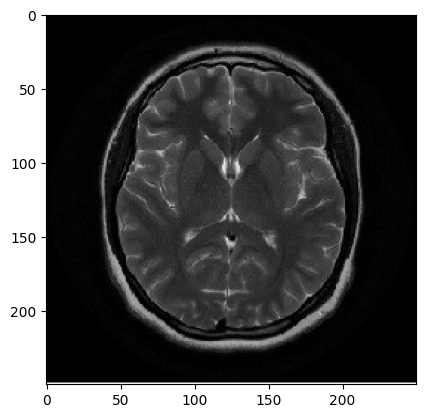

1/1 [==============================] - 1s 1s/step
You do not have a brain tumor


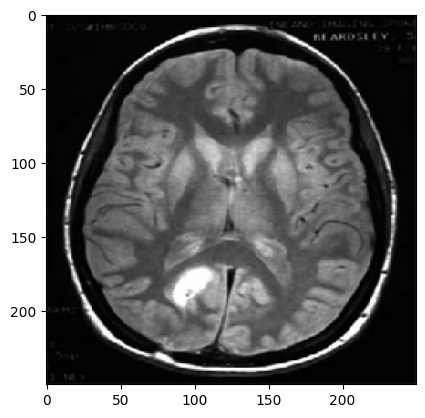

1/1 [==============================] - 0s 306ms/step
You have brain tumor


In [9]:
dir_path="brain_tumors/test_dataset/"

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+"//"+i, target_size=(250,250,3))
    plt.imshow(img)
    plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])

    res=model.predict(images)
    if res==0:
        print("You do not have a brain tumor")
    else:
        print("You have brain tumor")